# 1. Exploratory Data Analysis for Classification

Use this notebook to explore the bird vs drone classification dataset.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from glob import glob


In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6,4)


In [3]:
base_dir = "classification_dataset"

for subset in ["train", "valid", "test"]:
    bird_count = len(os.listdir(os.path.join(base_dir, subset, "bird")))
    drone_count = len(os.listdir(os.path.join(base_dir, subset, "drone")))
    print(f"{subset.upper()} - Bird: {bird_count}, Drone: {drone_count}")


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'classification_dataset\\train\\bird'

In [4]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\Hamza\Aerial_object\notebooks


In [5]:
import os

# go one level up from notebooks/
base_dir = os.path.join("..", "classification_dataset")

for subset in ["train", "valid", "test"]:
    bird_path = os.path.join(base_dir, subset, "bird")
    drone_path = os.path.join(base_dir, subset, "drone")

    # safety check
    if not os.path.exists(bird_path):
        print(f"❌ Folder not found: {bird_path}")
    else:
        bird_count = len(os.listdir(bird_path))
        drone_count = len(os.listdir(drone_path))
        print(f"{subset.upper()} - Bird: {bird_count}, Drone: {drone_count}")


TRAIN - Bird: 1414, Drone: 1248
VALID - Bird: 217, Drone: 225
TEST - Bird: 121, Drone: 94


In [6]:
import pathlib

# auto-detect dataset path (searches upwards)
root = pathlib.Path.cwd()
while not (root / "classification_dataset").exists() and root != root.parent:
    root = root.parent

base_dir = root / "classification_dataset"
print("✅ Dataset found at:", base_dir)


✅ Dataset found at: c:\Users\Hamza\Aerial_object\classification_dataset


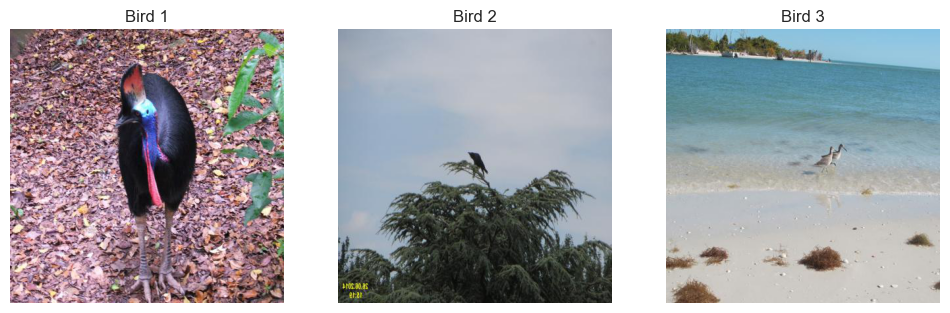

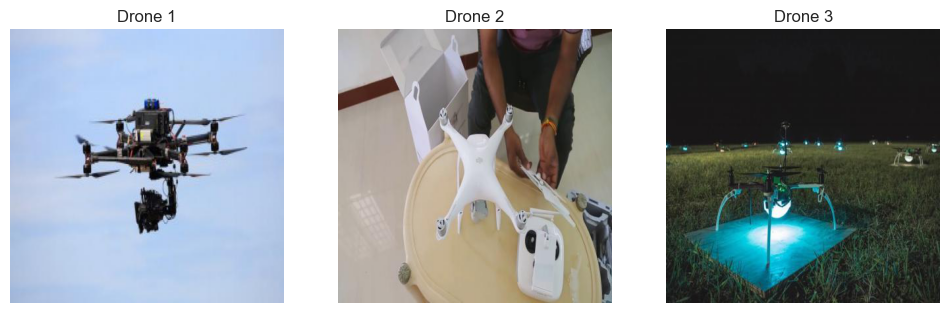

In [7]:
def show_samples(class_name, n=3):
    img_paths = random.sample(glob(f"{base_dir}/train/{class_name}/*.jpg"), n)
    plt.figure(figsize=(12,4))
    for i, path in enumerate(img_paths):
        img = Image.open(path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{class_name.capitalize()} {i+1}")
        plt.axis("off")
    plt.show()

show_samples("bird")
show_samples("drone")


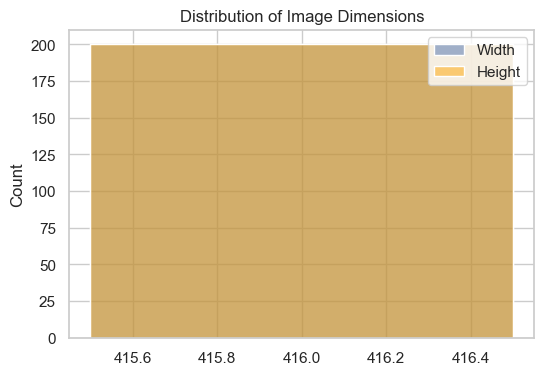

In [8]:
heights, widths = [], []
for img_path in random.sample(glob(f"{base_dir}/train/bird/*.jpg"), 200):
    with Image.open(img_path) as img:
        w, h = img.size
        widths.append(w)
        heights.append(h)

plt.figure(figsize=(6,4))
sns.histplot(widths, kde=True, label='Width')
sns.histplot(heights, kde=True, color='orange', label='Height')
plt.legend(); plt.title("Distribution of Image Dimensions"); plt.show()


In [9]:
corrupt = []
for path in glob(f"{base_dir}/**/*.jpg", recursive=True):
    try:
        img = Image.open(path)
        img.verify()
    except Exception:
        corrupt.append(path)

print(f"Corrupted images found: {len(corrupt)}")


Corrupted images found: 0


C:\Users\Hamza\AppData\Local\Temp\ipykernel_31832\4062938634.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette="viridis")


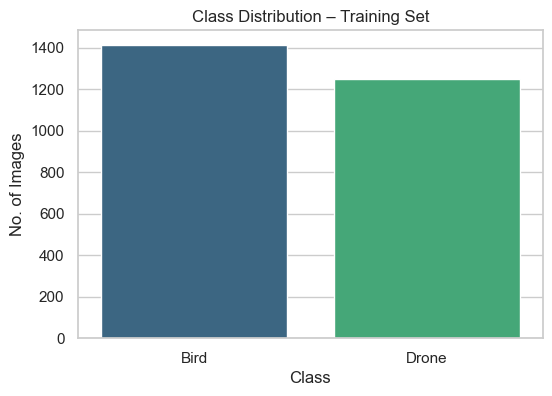

In [10]:
train_counts = {
    "Bird": len(os.listdir(f"{base_dir}/train/bird")),
    "Drone": len(os.listdir(f"{base_dir}/train/drone"))
}

sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette="viridis")
plt.title("Class Distribution – Training Set")
plt.xlabel("Class"); plt.ylabel("No. of Images")
plt.show()


In [11]:
img = Image.open(random.choice(glob(f"{base_dir}/train/bird/*.jpg")))
print(img.mode)  # Expected 'RGB'


RGB
